In [1]:
!conda install wordcloud --yes

Channels:
 - conda-forge
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.



In [2]:
!conda install nltk --yes

Channels:
 - conda-forge
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.



In [3]:
!conda install textblob --yes

Channels:
 - conda-forge
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.



In [4]:
!conda install transformers --yes

Channels:
 - conda-forge
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.



In [5]:
!conda install -c conda-forge tensorflow --yes

Channels:
 - conda-forge
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.



In [9]:
!conda install tf-keras --yes

Channels:
 - conda-forge
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /Users/tkang/miniforge3

  added / updated specs:
    - tf-keras


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    tf-keras-2.16.0            |     pyhd8ed1ab_0         885 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         885 KB

The following NEW packages will be INSTALLED:

  tf-keras           conda-forge/noarch::tf-keras-2.16.0-pyhd8ed1ab_0 



                                                                                
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import textblob
import tensorflow as tf
from wordcloud import WordCloud, ImageColorGenerator
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from transformers import pipeline

In [3]:
url = "cheatsheet_or_no_cheatsheet_MDS - Form Responses 1.csv"
default_column_names = np.arange(4)
new_column_names = ["timestamp", "q1", "q1_detail", "q2"]
df = pd.read_csv(url, header=None)
df.rename(columns=dict(zip(default_column_names, new_column_names)), inplace=True)
df.head()

,timestamp,q1,q1_detail,q2
0,Timestamp,Feedback/Experience on using/creating Cheatshe...,What about it is/isn't working about the cheat...,Possible Alternatives to current method of usi...
1,9/23/2024 11:58:54,2,Unclear guidelines and non-sense updates\nUncl...,"Fully open book exams - no more cheatsheets, A..."
2,9/23/2024 11:58:56,1,NaN,Fully open book exams - no more cheatsheets
3,9/23/2024 12:01:42,10,things that are working: digitally writing che...,"Ability to digitally type cheatsheets, Each co..."
4,9/23/2024 12:03:08,3,NaN,"Fully open book exams - no more cheatsheets, C..."


All PyTorch model weights were used when initializing TFBartForConditionalGeneration.

All the weights of TFBartForConditionalGeneration were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBartForConditionalGeneration for predictions without further training.
/Users/tkang/miniforge3/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


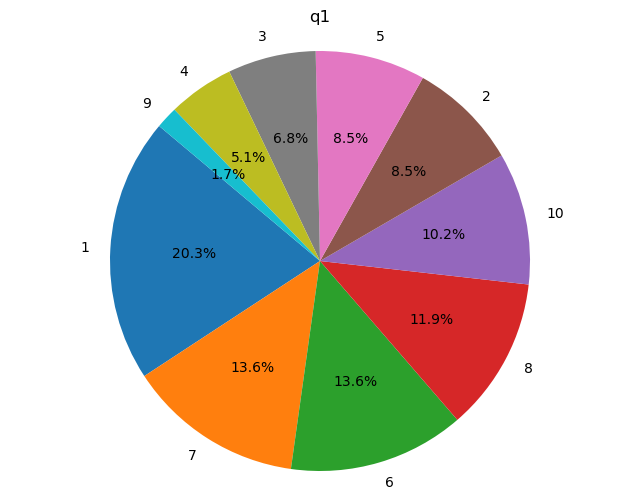

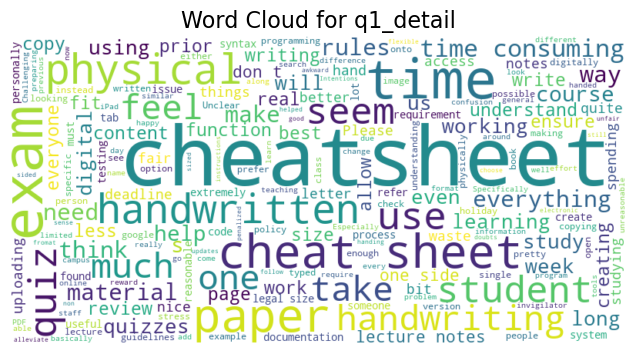

Summary of q1_detail:


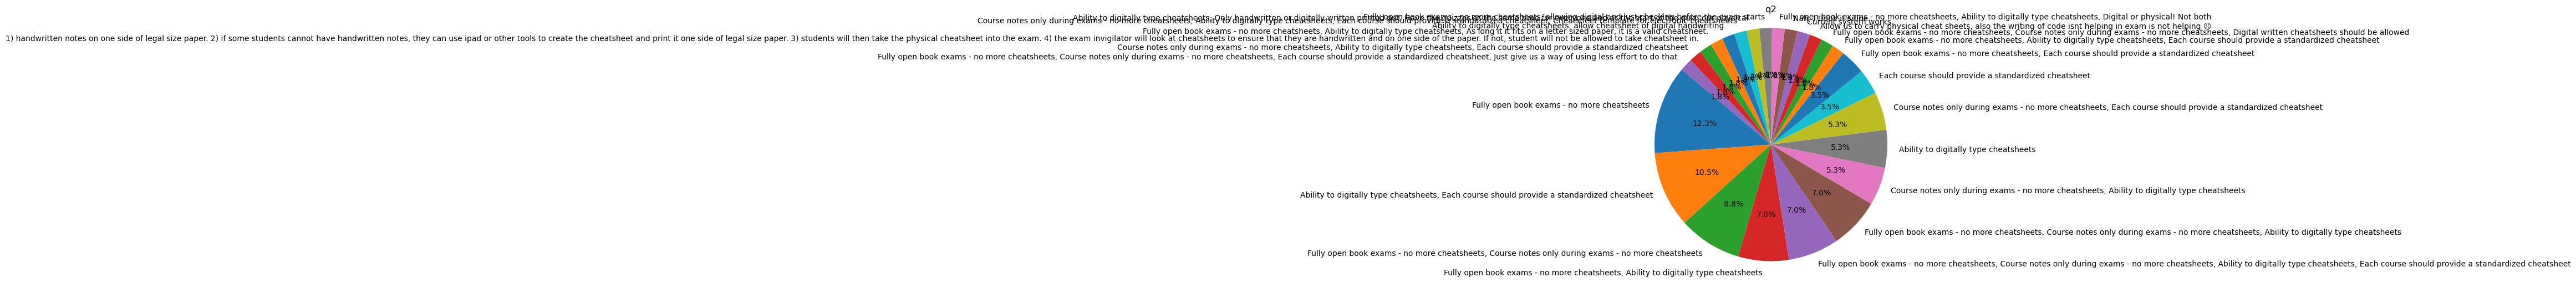

In [4]:
def generate_wordcloud(text, column_name):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for {column_name}", fontsize=16)
    plt.axis('off')
    plt.show()

def generate_pie_chart(counts, title):
    plt.figure(figsize=(8, 6))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
    plt.show()

# Loop through each column and generate word cloud
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

for column in df.columns:
    if column == 'timestamp': continue
    if column.endswith('_detail'):
        all_text = ' '.join(df[column].dropna().astype(str).tolist())
        generate_wordcloud(all_text, column)
        # summary = summarizer(all_text, max_length=50, min_length=40, do_sample=False)
        print(f"Summary of {column}:")
        # print(summary[0]['summary_text'])
    else:
        counts = df.loc[1:, column].value_counts()
        generate_pie_chart(counts, column)

In [17]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/tkang/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [18]:
df_sentiment_analysis = df
def sentiment_analysis_textblob(text):
    return TextBlob(text).sentiment

# Apply sentiment analysis for each column
for column in df_sentiment_analysis.columns:
    if column.endswith('_detail'):
        print(f"\nSentiment analysis for {column} complete")
        insert_index = df_sentiment_analysis.columns.get_loc(column)
        new_column_name = f'{column}_sentiment'
        new_column_data = df_sentiment_analysis[column].apply(lambda x: sentiment_analysis_textblob(str(x)).polarity)
        df_sentiment_analysis.insert(insert_index+1, new_column_name, new_column_data)

df_sentiment_analysis
    


Sentiment analysis for q1_detail complete

Sentiment analysis for q2_detail complete

Sentiment analysis for q3_detail complete

Sentiment analysis for q4_detail complete

Sentiment analysis for q5_detail complete

Sentiment analysis for q6_detail complete

Sentiment analysis for working_detail complete

Sentiment analysis for not_working_detail complete

Sentiment analysis for other_detail complete


,timestamp,q1,q1_detail,q1_detail_sentiment,q2,q2_detail,q2_detail_sentiment,q3,q3_detail,q3_detail_sentiment,...,q5_detail_sentiment,q6,q6_detail,q6_detail_sentiment,working_detail,working_detail_sentiment,not_working_detail,not_working_detail_sentiment,other_detail,other_detail_sentiment
0,Timestamp,Q1: How satisfied are you with the structure o...,"If you have anything to share for Q1, please u...",0.000000,Q2. How satisfied are you with the assessment ...,"If you have anything to share for Q2, please u...",0.000000,Q3. How satisfied are you with the Instructors...,"If you have anything to share for Q3, please u...",0.000000,...,0.000000,Q6. How has balancing the course workload been...,"If you have anything to share for Q6, please u...",0.000000,What are some things that's working well for y...,0.227273,What are some things that's absolutely NOT wor...,-0.200000,If you have anything else to share with the in...,0.000000
1,9/21/2024 16:49:35,Neutral,I'm not a fan of the flipped classroom concept...,0.425000,Very satisfied,NaN,0.000000,Very satisfied,NaN,0.000000,...,0.000000,Mostly Manageable,NaN,0.000000,Everything is going great other than the flip ...,0.337500,I am not able to watch the recorded lectures a...,-0.250000,NaN,0.000000
2,9/21/2024 17:00:18,Dissatisfied,NaN,0.000000,Dissatisfied,NaN,0.000000,Neutral,NaN,0.000000,...,0.000000,Extremely difficult to manage,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000
3,9/21/2024 17:07:21,Neutral,Week 3 is quite intense. I'm okay the whole st...,0.300000,Neutral,"For the quiz assessment structure, I don't lik...",-0.046667,Neutral,"For 521, Andy is too fast and sometimes, I don...",0.382143,...,0.000000,Frequently Overwhelming,I feel burn out already for the upcoming two w...,0.000000,NaN,0.000000,I'm not sure how shuffle the quiz questions ar...,-0.143056,NaN,0.000000
4,9/21/2024 18:05:19,Dissatisfied,I think the fast paced is not ideal for people...,-0.125000,Dissatisfied,The assessments should be one assessment at th...,0.000000,Neutral,Instructors can rush through materials but emp...,0.062500,...,0.000000,Frequently Overwhelming,The labs should be less challenging and more o...,0.277778,Class and lab structure,0.000000,Not understanding some concepts very fast has ...,-0.070000,NaN,0.000000
5,9/21/2024 18:44:01,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,...,0.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000
6,9/21/2024 20:51:06,Satisfied,NaN,0.000000,Satisfied,NaN,0.000000,Satisfied,NaN,0.000000,...,0.000000,Sometimes Overwhelming,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000
7,9/21/2024 21:42:56,Dissatisfied,The introductory nature of the subjects feels ...,0.204444,Dissatisfied,A fifty minute window for quizzes is too short...,0.238095,Neutral,It is very often that the rushed nature of the...,0.092431,...,0.000000,Extremely difficult to manage,"Both of this questions go hand in hand, becaus...",0.105556,"pre-lectures, worksheets, lab materials",0.000000,"Workload, lack of rest, rushed lectures, lab s...",0.000000,While it makes sense to have divided the cohor...,0.225000
8,9/21/2024 21:58:28,Satisfied,Pretty good grading system and course logistic...,0.192857,Neutral,"I might actually prefer no cheatsheet, since I...",0.000000,Satisfied,Perhaps the reverse lecture (523 - R Programmi...,0.283673,...,0.400000,Mostly Manageable,Pretty manageable,0.250000,"Good teacher instruction, TA instruction",0.700000,It's not super professional seeing the frequen...,0.011111,Good work! It's obvious all the professors and...,0.458333
9,9/22/2024 0:41:04,Satisfied,NaN,0.000000,Satisfied,NaN,0.000000,Neutral,NaN,0.000000,...,0.000000,Extremely difficult to manage,NaN,0.000000,Lecture notes.,0.000000,There's no lecture recording.,0.000000,NaN,0.000000
